# Artifical Neural Networks (ANNs)
Leslie Kerby

### MNIST Fashion Dataset and Sequential API

In [ ]:
# Default runtime is GPU

import tensorflow as tf
from tensorflow import keras

import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
# Segway with MNIST digits
mnist_digits = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist_digits.load_data()

11490434/11490434 [==============================] - 2s 0us/step


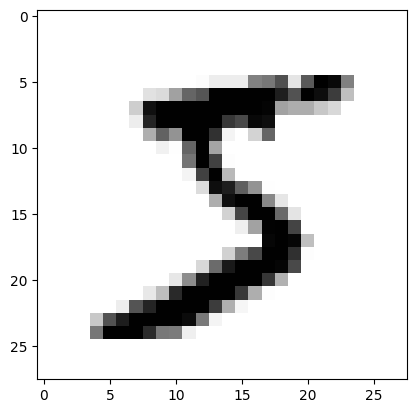

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap='binary')

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
type(X_train_full)

numpy.ndarray

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

5

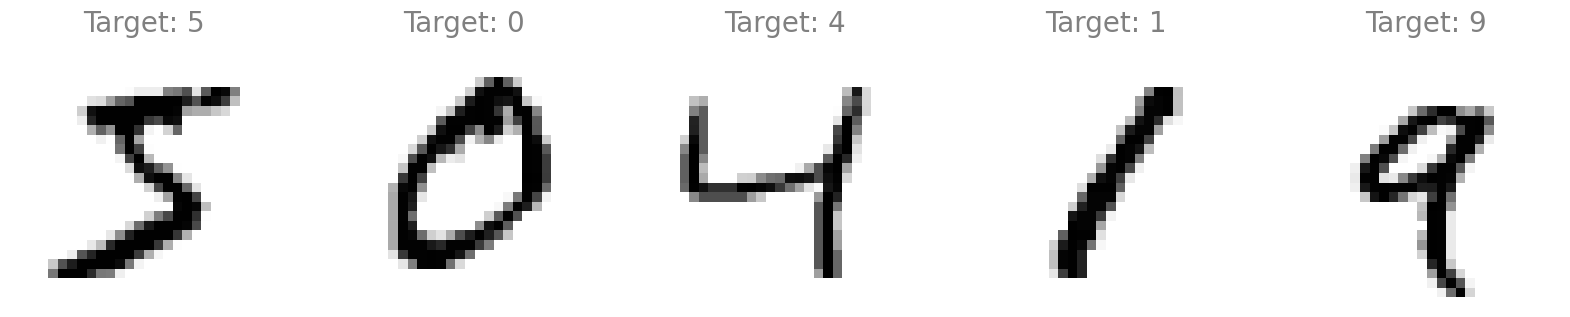

In [ ]:
plt.figure(figsize=(20,8))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_train_full[index], cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {y_train_full[index]}', fontsize=20, c='grey')

plt.show()

In [ ]:
# Come back to MNIST Fashion dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
type(X_train_full)

numpy.ndarray

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

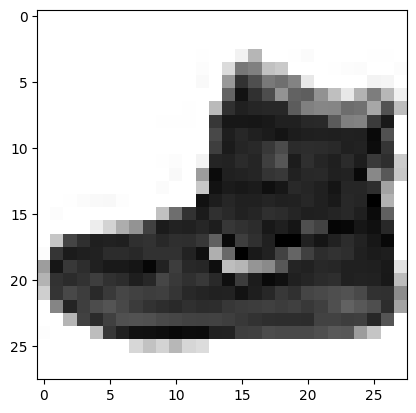

In [ ]:
plt.imshow(X_train_full[0], cmap='binary')

In [ ]:
y_train_full[0]

9

In [ ]:
classes = ['T-shirt/top', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
# we used method value_counts() -- but this is a pandas method
# y_train_full.value_counts()

# Use collections Counter
from collections import Counter
Counter(y_train_full)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

**Question 1** </br>
Plot an image of pants from the training set.

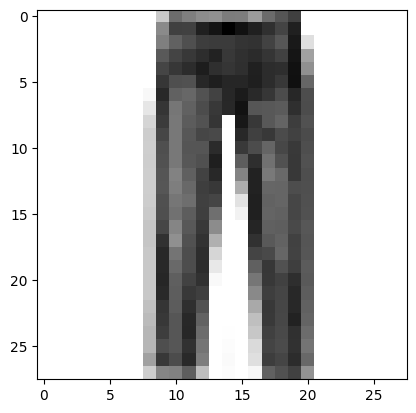

In [ ]:
pants = X_train_full[y_train_full==1]
plt.imshow(pants[0], cmap='binary')

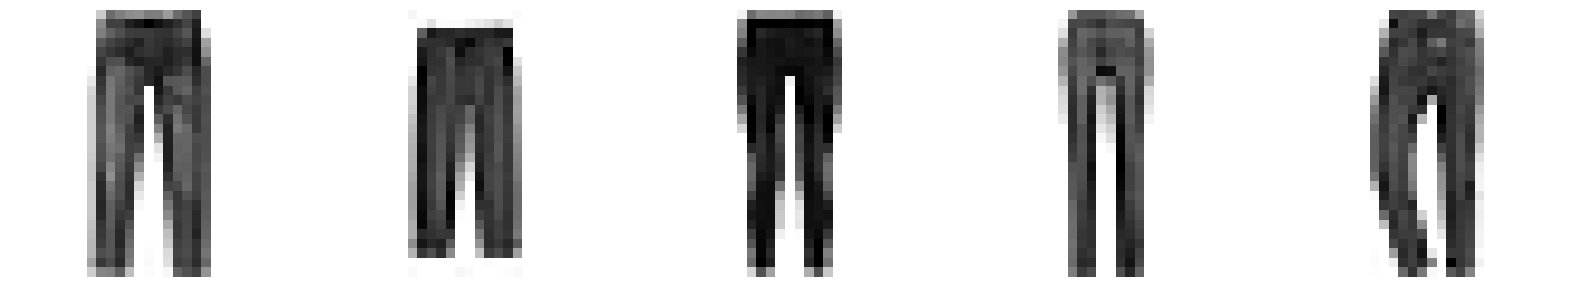

In [ ]:
plt.figure(figsize=(20,8))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(pants[index], cmap='binary')
  plt.axis('off')
  #plt.title(f'Target: {y_train_full[index]}', fontsize=20, c='grey')

plt.show()

Training a NN with Keras
1. Preprocess data
2. Create model (NN architecture)
3. Compile (specify loss function, optimizers, metrics)
4. Fit (training & validate, batch_size, \# epochs)
5. Evaluate

In [ ]:
# 1. Preprocess data (both training and testing datasets)

# Scale to [0,1]
X_train_full = X_train_full/255
X_test = X_test/255
# Only execute this cell once!
# If you don't scale the data keras does not achieve higher than 10% accuracy

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
# Reshape to 1D, or flatten, before sending to keras
X_train_full = X_train_full.reshape(-1, 784) # -1 tells numpy to figure out size, would be 60000
X_test = X_test.reshape(-1, 784)  # -1 would be 10000

In [ ]:
X_train_full.shape

(60000, 784)

In [ ]:
# Create validation dataset
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=5000)

# Note keras does have an optional parameter
# validation_split = fraction
# which takes data from the end of the training set and uses it for validation --
# however it takes from the end (not random)

In [ ]:
X_train_tr.shape

(55000, 784)

In [ ]:
X_train_v.shape

(5000, 784)

In [ ]:
# 2. Create model
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation="relu", input_shape=(784,),
                             name="First_Hidden_Layer"))
model.add(keras.layers.Dense(500, activation="relu", name="Second_Hidden_Layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_Layer"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_Layer (Dense)  (None, 500)               392500    
                                                                 
 Second_Hidden_Layer (Dense)  (None, 500)              250500    
                                                                 
 Output_Layer (Dense)        (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


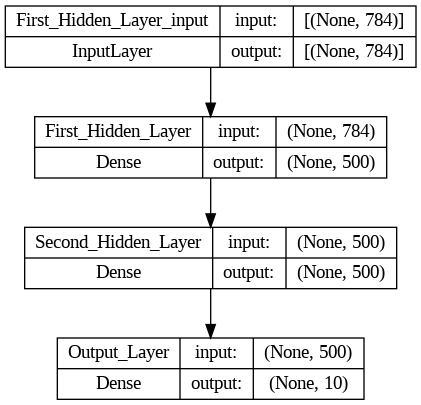

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.layers[0].name

'First_Hidden_Layer'

In [ ]:
model.layers[0].get_weights()

[array([[ 0.03814585,  0.01600864, -0.00810173, ..., -0.05080074,
          0.04868218, -0.04232697],
        [ 0.06802031,  0.01593277, -0.02789614, ..., -0.00592553,
         -0.00072934, -0.03052552],
        [-0.00188561, -0.03379737,  0.03831305, ..., -0.05206217,
          0.05319323, -0.06551292],
        ...,
        [-0.01613019, -0.05686281,  0.01140668, ..., -0.04088095,
         -0.02586072,  0.05242401],
        [-0.05758807, -0.03830266,  0.03851379, ...,  0.06468024,
          0.04222906, -0.06357183],
        [-0.03360153,  0.04039032,  0.03902882, ...,  0.01894309,
          0.06552883, -0.0118934 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
model.layers[0].get_weights()[0] # connection weights in first hidden layer
# [1] -> biases

array([[ 0.03814585,  0.01600864, -0.00810173, ..., -0.05080074,
         0.04868218, -0.04232697],
       [ 0.06802031,  0.01593277, -0.02789614, ..., -0.00592553,
        -0.00072934, -0.03052552],
       [-0.00188561, -0.03379737,  0.03831305, ..., -0.05206217,
         0.05319323, -0.06551292],
       ...,
       [-0.01613019, -0.05686281,  0.01140668, ..., -0.04088095,
        -0.02586072,  0.05242401],
       [-0.05758807, -0.03830266,  0.03851379, ...,  0.06468024,
         0.04222906, -0.06357183],
       [-0.03360153,  0.04039032,  0.03902882, ...,  0.01894309,
         0.06552883, -0.0118934 ]], dtype=float32)

In [ ]:
model.layers[2].get_weights()[0].shape

(500, 10)

In [ ]:
# 3. Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

# Some explanation on the cross entropy loss function:
# depends on your input type
# sparse_categorical_crossentropy is for when we have "sparse" labels--
#    each instance has one target index, ie with different numbers or
#    labels for the different classes (THIS IS WHAT WE HAVE) (ie [2])
#    -- classes are exclusive
# categorical_crossentropy is for when each instance has one target
#    probability for each class (ie a one-hot vector [0,0,1,0,0,0,0,0,0,0]
#    to represent class 2); you'll have this if you use one-hot-encoding
# binary_crossentropy is for binary classification -- and then "sigmoid" or
#    logistic as the activation function (instead of "softmax")

# "sgd" means Stochastic Gradient Descent, which uses a default learning rate
#     of 0.01; we can specify the learning rate by using:
#     optimizer=keras.optimizers.SGD(lr=?)

In [ ]:
y_train_tr[0]

2

In [ ]:
# 4. Fit (ie train) on data
history = model.fit(X_train_tr, y_train_tr, epochs=20, batch_size=32,
                    validation_data=(X_train_v, y_train_v))

Epoch 1/20
1719/1719 [==============================] - 21s 7ms/step - loss: 0.7131 - accuracy: 0.7668 - val_loss: 0.5551 - val_accuracy: 0.7994
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4831 - accuracy: 0.8331 - val_loss: 0.4642 - val_accuracy: 0.8354
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4381 - accuracy: 0.8478 - val_loss: 0.4676 - val_accuracy: 0.8354
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4117 - accuracy: 0.8571 - val_loss: 0.4127 - val_accuracy: 0.8558
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3903 - accuracy: 0.8633 - val_loss: 0.3963 - val_accuracy: 0.8608
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3753 - accuracy: 0.8690 - val_loss: 0.3946 - val_accuracy: 0.8656
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3598 - accuracy: 0.8737 - val_loss: 0.3774 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
history.history

{'loss': [0.7131446599960327,
  0.483133465051651,
  0.4381145238876343,
  0.4116921126842499,
  0.3903057873249054,
  0.37527281045913696,
  0.35976719856262207,
  0.34767964482307434,
  0.3372250497341156,
  0.32727518677711487,
  0.31779566407203674,
  0.3094639778137207,
  0.30174851417541504,
  0.29464855790138245,
  0.28783097863197327,
  0.28208959102630615,
  0.27529704570770264,
  0.27005499601364136,
  0.2645244002342224,
  0.2594047486782074],
 'accuracy': [0.7668363451957703,
  0.8330727219581604,
  0.8477818369865417,
  0.8571272492408752,
  0.8633090853691101,
  0.8689636588096619,
  0.8737272620201111,
  0.8773454427719116,
  0.8815090656280518,
  0.8835272789001465,
  0.8871999979019165,
  0.8905818462371826,
  0.8932909369468689,
  0.8942182064056396,
  0.8971454501152039,
  0.8981636166572571,
  0.9020363688468933,
  0.9028000235557556,
  0.9047091007232666,
  0.9072363376617432],
 'val_loss': [0.5550658702850342,
  0.46422216296195984,
  0.46759897470474243,
  0.4127

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Axes: >

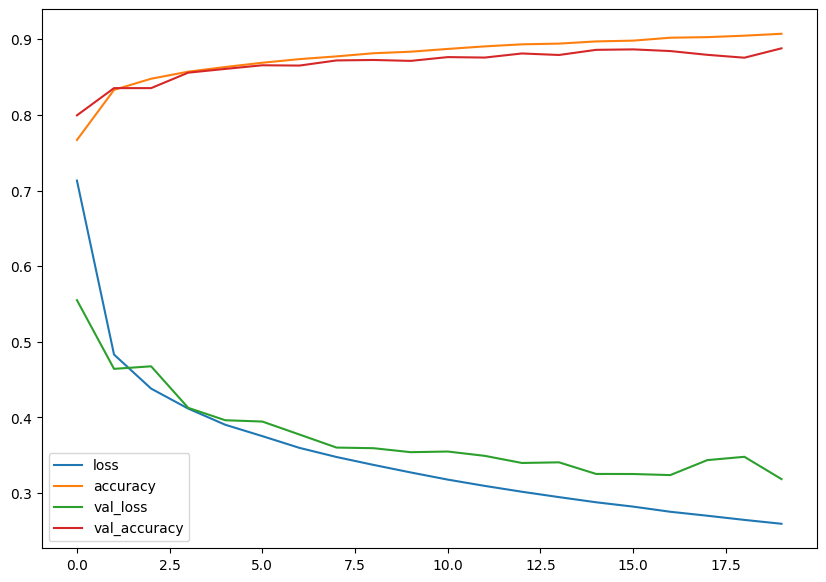

In [ ]:
import pandas as pd
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
# This NN model will be saved and if we continue training it will start
# from the previous level of learning (keeps connection weights from epoch 20 above)
history_2 = model.fit(X_train_tr, y_train_tr, epochs=10, validation_data=(X_train_v, y_train_v))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2536 - accuracy: 0.9083 - val_loss: 0.3212 - val_accuracy: 0.8826
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2488 - accuracy: 0.9110 - val_loss: 0.3203 - val_accuracy: 0.8854
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2441 - accuracy: 0.9126 - val_loss: 0.3450 - val_accuracy: 0.8772
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2414 - accuracy: 0.9130 - val_loss: 0.3191 - val_accuracy: 0.8874
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2356 - accuracy: 0.9153 - val_loss: 0.3102 - val_accuracy: 0.8902
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2331 - accuracy: 0.9164 - val_loss: 0.3193 - val_accuracy: 0.8886
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2275 - accuracy: 0.9185 - val_loss: 0.3253 - val_accuracy:

In [ ]:
history_2.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [ ]:
histories = pd.DataFrame(history.history)
histories

,loss,accuracy,val_loss,val_accuracy
0,0.713145,0.766836,0.555066,0.7994
1,0.483133,0.833073,0.464222,0.8354
2,0.438115,0.847782,0.467599,0.8354
3,0.411692,0.857127,0.412700,0.8558
4,0.390306,0.863309,0.396301,0.8608
5,0.375273,0.868964,0.394566,0.8656
6,0.359767,0.873727,0.377417,0.8652
7,0.347680,0.877345,0.360153,0.8720
8,0.337225,0.881509,0.359317,0.8726
9,0.327275,0.883527,0.354064,0.8714


In [ ]:
histories = histories.append(pd.DataFrame(history_2.history),
                             ignore_index=True)
histories

<ipython-input-48-ccdc36b1c4e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histories = histories.append(pd.DataFrame(history_2.history),


,loss,accuracy,val_loss,val_accuracy
0,0.713145,0.766836,0.555066,0.7994
1,0.483133,0.833073,0.464222,0.8354
2,0.438115,0.847782,0.467599,0.8354
3,0.411692,0.857127,0.412700,0.8558
4,0.390306,0.863309,0.396301,0.8608
5,0.375273,0.868964,0.394566,0.8656
6,0.359767,0.873727,0.377417,0.8652
7,0.347680,0.877345,0.360153,0.8720
8,0.337225,0.881509,0.359317,0.8726
9,0.327275,0.883527,0.354064,0.8714


<Axes: >

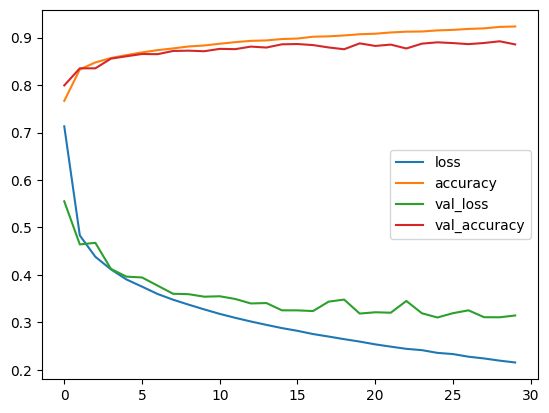

In [ ]:
histories.plot()

In [ ]:
# Now check test accuracy
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8828


[0.329299658536911, 0.8827999830245972]

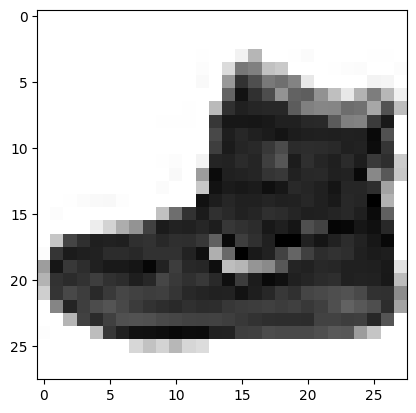

In [ ]:
# How to predict other cases
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0].reshape(28,28), cmap='binary')

In [ ]:
model.predict(X_train_full[:1])
# create a collection of one as keras needs a collection
# 99.5% chance of being class 9 = ankle boot
# 0.5% chance of being class 7 = sneaker

1/1 [==============================] - 0s 81ms/step


array([[1.1035210e-08, 2.1893403e-09, 6.4478575e-11, 3.6977618e-10,
        3.1868491e-10, 3.2810342e-05, 1.0679033e-09, 3.4083340e-03,
        2.9379629e-07, 9.9655861e-01]], dtype=float32)

1/1 [==============================] - 0s 20ms/step


<BarContainer object of 10 artists>

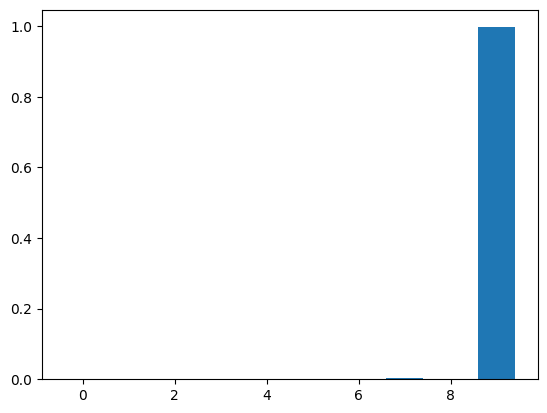

In [ ]:
plt.bar(range(10),model.predict(X_train_full[:1])[0])

In [ ]:
np.argmax(model.predict(X_train_full[:1]))

1/1 [==============================] - 0s 17ms/step


9

In [ ]:
# model.predict_classes(X_train_full[:1])  # this is deprecated
np.argmax(model.predict(X_train_full[:1]))

1/1 [==============================] - 0s 18ms/step


9

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
predictions
#model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

313/313 [==============================] - 1s 2ms/step


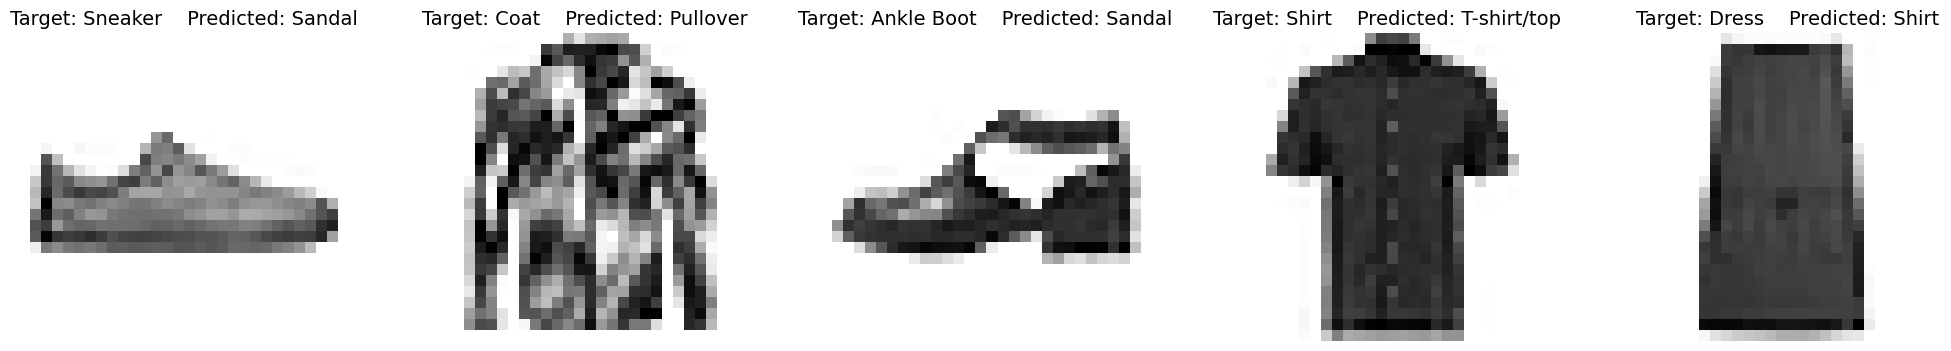

In [ ]:
# Display misclassified images...
# predictions = model.predict_classes(X_test) # this is deprecated
# instead of predict_classes you could use
# np.argmax(model.predict(X_test), axis=-1) to return the class (index) with
# highest probability
predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

313/313 [==============================] - 1s 2ms/step


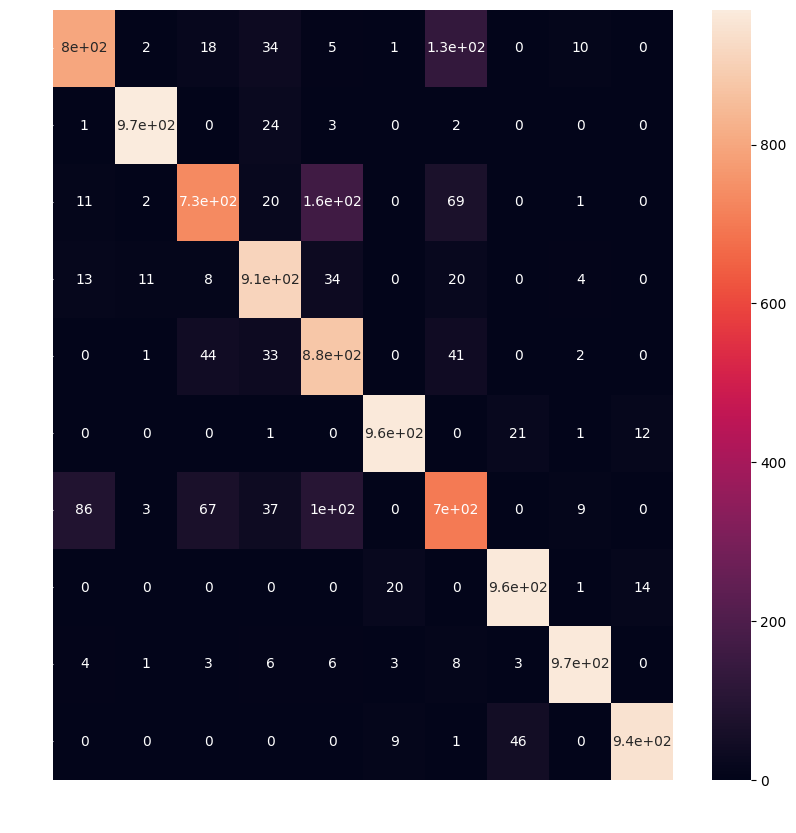

In [ ]:
# Confusion matrix (part of validation)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
plt.tick_params(color='white',labelcolor='white')
plt.show()

In [ ]:
# Saving and Restoring
model.save("fashion")
# This works for Sequential API and Functional API
# Works most of the time for subclassing API, may you need to
# write get_config() method

In [ ]:
# To clear connection weights and re-train NN
# (ie changing architecture will also reset)
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.load_model("fashion")
np.argmax(model.predict(X_train_full[:1]), axis=-1)

1/1 [==============================] - 0s 77ms/step


array([9])

In [ ]:
# save weights
model.save_weights("fashion_weights")

model.load_weights("fashion_weights")

### Regression with MLPs on California Housing data (Sequential and Functional API)

In [ ]:
# Change runtime to GPU!

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Import California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.data.shape
# 20,640 homes, 8 features

(20640, 8)

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
housing.target # Average house value in block in $100k

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# 1. Preprocess
# Create training and testing and validation sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                              test_size=1/5)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=1/10)

In [ ]:
X_train_tr.shape

(14860, 8)

In [ ]:
# Scale data for keras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
# Remember only fit on training data, then transform validation and testing sets
X_train_v = scaler.transform(X_train_v)
X_test = scaler.transform(X_test)


In [ ]:
# 2. Create model/NN architecture
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=(8,)),
  keras.layers.Dense(1) # output price
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3. Compile model
model.compile(loss="mean_squared_error", optimizer="sgd",
              metrics=[tf.keras.metrics.MeanSquaredError()])
# many other metrics available:
# https://keras.io/api/metrics/

In [ ]:
# 4. Fit model
history = model.fit(X_train_tr, y_train_tr, epochs=20,
                    validation_data=(X_train_v, y_train_v))

Epoch 1/20
465/465 [==============================] - 2s 4ms/step - loss: 0.8045 - mean_squared_error: 0.8045 - val_loss: 0.6486 - val_mean_squared_error: 0.6486
Epoch 2/20
465/465 [==============================] - 1s 3ms/step - loss: 0.5586 - mean_squared_error: 0.5586 - val_loss: 0.4696 - val_mean_squared_error: 0.4696
Epoch 3/20
465/465 [==============================] - 1s 3ms/step - loss: 0.4583 - mean_squared_error: 0.4583 - val_loss: 0.4484 - val_mean_squared_error: 0.4484
Epoch 4/20
465/465 [==============================] - 1s 3ms/step - loss: 0.4405 - mean_squared_error: 0.4405 - val_loss: 0.4335 - val_mean_squared_error: 0.4335
Epoch 5/20
465/465 [==============================] - 2s 3ms/step - loss: 0.4275 - mean_squared_error: 0.4275 - val_loss: 0.4234 - val_mean_squared_error: 0.4234
Epoch 6/20
465/465 [==============================] - 2s 5ms/step - loss: 0.4193 - mean_squared_error: 0.4193 - val_loss: 0.4200 - val_mean_squared_error: 0.4200
Epoch 7/20
465/465 [========

In [ ]:
# 5. Evaluate model
mse_test = model.evaluate(X_test, y_test)
mse_test

129/129 [==============================] - 0s 3ms/step - loss: 0.3861 - mean_squared_error: 0.3861


[0.3861236572265625, 0.3861236572265625]

In [ ]:
print("Actual: ", y_test[:5])
print("Predicted: ", model.predict(X_test[:5]))

Actual:  [0.477   0.458   5.00001 2.186   2.78   ]
1/1 [==============================] - 0s 77ms/step
Predicted:  [[0.60440755]
 [1.5419283 ]
 [3.635963  ]
 [2.7285357 ]
 [2.8651233 ]]


In [ ]:
(.377)**0.5

0.6140032573203501

<Axes: >

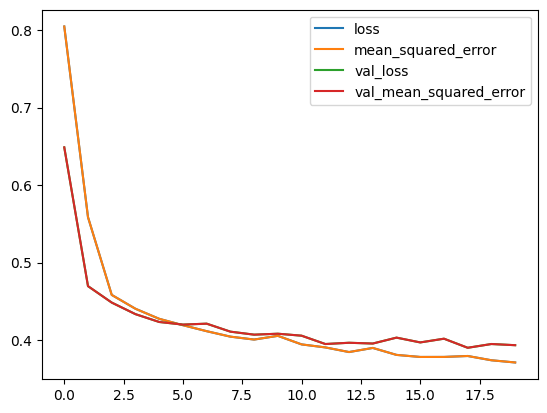

In [ ]:
#plt.plot(pd.DataFrame(history.history))
histories = pd.DataFrame(history.history)
histories.plot()

### Functional API

In [ ]:
# Step 2. build deep and wide NN architecture (using Functional API)
input_ = keras.layers.Input(shape=(8,))
hidden1 = keras.layers.Dense(30,activation="relu",name="Hidden1")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
# concatenation layer needed to merge into single tensor
# can't send two layers into a Dense layer -- it will error

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 Hidden1 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 30)           930         ['Hidden1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_2[0][0]']            

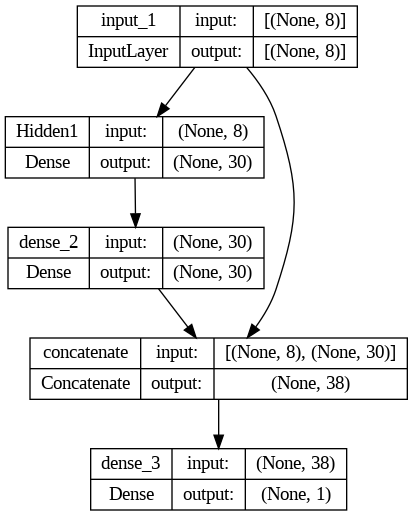

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss="mse", optimizer="sgd")

In [ ]:
history = model.fit(X_train_tr, y_train_tr, epochs=20,
                    validation_data=(X_train_v, y_train_v))

Epoch 1/20
465/465 [==============================] - 3s 4ms/step - loss: 1.4347 - val_loss: 0.7735
Epoch 2/20
465/465 [==============================] - 1s 3ms/step - loss: 180.3991 - val_loss: 1.8009
Epoch 3/20
465/465 [==============================] - 2s 3ms/step - loss: 10.2455 - val_loss: 0.6161
Epoch 4/20
465/465 [==============================] - 1s 3ms/step - loss: 5.6343 - val_loss: 0.5231
Epoch 5/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5201 - val_loss: 0.4965
Epoch 6/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5113 - val_loss: 0.5020
Epoch 7/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5129 - val_loss: 0.5021
Epoch 8/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5053 - val_loss: 0.5002
Epoch 9/20
465/465 [==============================] - 1s 3ms/step - loss: 0.5096 - val_loss: 0.4985
Epoch 10/20
465/465 [==============================] - 2s 3ms/step - loss: 0.6560 - val_loss: 0.4

<Axes: >

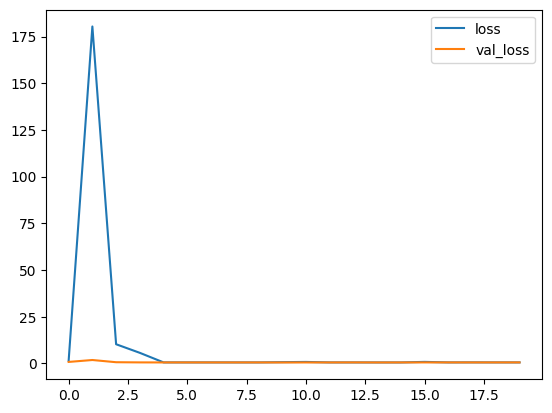

In [ ]:
pd.DataFrame(history.history).plot()
# Learning rate is too large -- loss is bouncing around
# Does look like it may be converging to smaller val_loss than the Sequential...

In [ ]:
# Change learning rate
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.005))
# Default lr=0.01

In [ ]:
history = model.fit(X_train_tr, y_train_tr, epochs=20,
                    validation_data=(X_train_v, y_train_v))

Epoch 1/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5121 - val_loss: 0.5003
Epoch 2/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5048 - val_loss: 0.5024
Epoch 3/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5038 - val_loss: 0.5143
Epoch 4/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5050 - val_loss: 0.5043
Epoch 5/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5028 - val_loss: 0.5011
Epoch 6/20
465/465 [==============================] - 1s 3ms/step - loss: 0.5021 - val_loss: 0.5038
Epoch 7/20
465/465 [==============================] - 1s 3ms/step - loss: 0.5031 - val_loss: 0.5024
Epoch 8/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5024 - val_loss: 0.5012
Epoch 9/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5029 - val_loss: 0.5003
Epoch 10/20
465/465 [==============================] - 2s 3ms/step - loss: 0.5041 - val_loss: 0.5018

<Axes: >

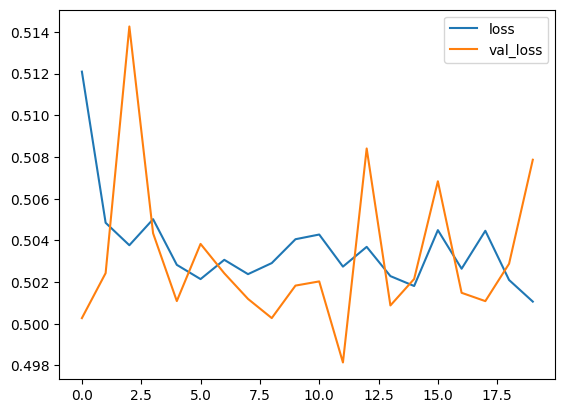

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.5691


0.5690705180168152

In [ ]:
# Multiple inputs
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu",name="Hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name="Hidden2")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
# concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
# concatenation layer needed to merge into single tensor
# can't send two layers into a Dense layer -- it will error

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=5e-3))

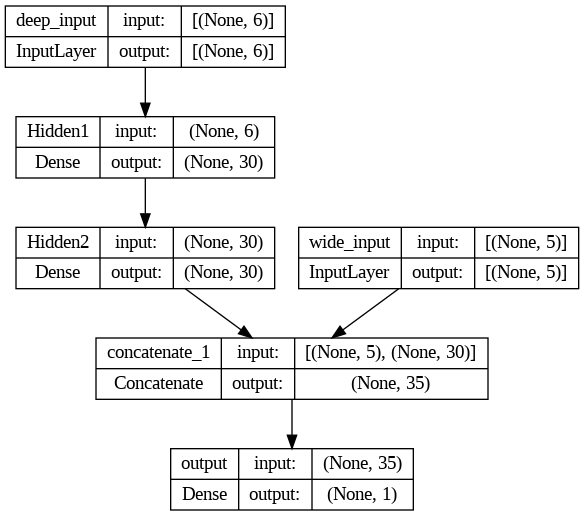

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit( (X_train_tr[:,:5], X_train_tr[:,2:]), y_train_tr,
                    epochs=20,
                    validation_data=((X_train_v[:,:5], X_train_v[:,2:]),y_train_v))

Epoch 1/20
465/465 [==============================] - 2s 4ms/step - loss: 0.7699 - val_loss: 0.7989
Epoch 2/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5284 - val_loss: 0.4638
Epoch 3/20
465/465 [==============================] - 2s 3ms/step - loss: 0.4532 - val_loss: 0.4409
Epoch 4/20
465/465 [==============================] - 2s 3ms/step - loss: 0.4364 - val_loss: 0.4336
Epoch 5/20
465/465 [==============================] - 2s 4ms/step - loss: 0.4256 - val_loss: 0.4225
Epoch 6/20
465/465 [==============================] - 2s 5ms/step - loss: 0.4146 - val_loss: 0.4132
Epoch 7/20
465/465 [==============================] - 2s 3ms/step - loss: 0.4048 - val_loss: 0.4220
Epoch 8/20
465/465 [==============================] - 2s 4ms/step - loss: 0.3966 - val_loss: 0.3956
Epoch 9/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3983 - val_loss: 0.3901
Epoch 10/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3852 - val_loss: 0.3839

In [ ]:
# Create two outputs, use auxiliary output for regularization (reduce overfitting)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu",name="Hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name="Hidden2")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

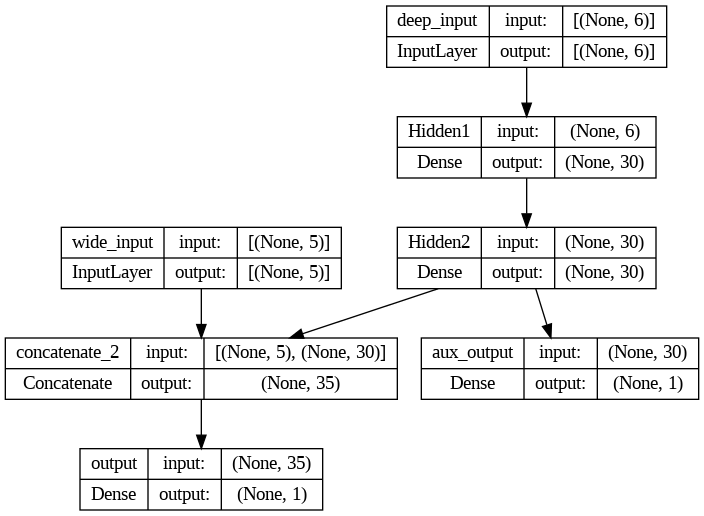

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1],
              optimizer=tf.keras.optimizers.SGD(lr=5e-3))
# give loss functions for [output, aux_output], and
# weight the aux_output less

In [ ]:
X_train_A, X_train_B = X_train_tr[:,:5], X_train_tr[:,2:]
# Why do this? -- Easier to read (make sure you get the slice right only one time)
# Why not do this? -- Inefficient memory use (creates a deep copy); and any changes made
#    to original dataset won't be made to _A or _B

In [ ]:
history = model.fit( [X_train_A, X_train_B], [y_train_tr, y_train_tr],
                    epochs=20,
                    validation_data=((X_train_v[:,:5], X_train_v[:,2:]),
                                     [y_train_v, y_train_v]))

Epoch 1/20
465/465 [==============================] - 3s 5ms/step - loss: 0.8547 - output_loss: 0.7795 - aux_output_loss: 1.5316 - val_loss: 0.5531 - val_output_loss: 0.5083 - val_aux_output_loss: 0.9554
Epoch 2/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5842 - output_loss: 0.5486 - aux_output_loss: 0.9046 - val_loss: 0.5282 - val_output_loss: 0.4925 - val_aux_output_loss: 0.8502
Epoch 3/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5070 - output_loss: 0.4750 - aux_output_loss: 0.7953 - val_loss: 0.5281 - val_output_loss: 0.5077 - val_aux_output_loss: 0.7110
Epoch 4/20
465/465 [==============================] - 2s 4ms/step - loss: 0.4893 - output_loss: 0.4646 - aux_output_loss: 0.7115 - val_loss: 0.4687 - val_output_loss: 0.4480 - val_aux_output_loss: 0.6551
Epoch 5/20
465/465 [==============================] - 2s 5ms/step - loss: 0.4629 - output_loss: 0.4410 - aux_output_loss: 0.6597 - val_loss: 0.4535 - val_output_loss: 0.4354 - val_aux_

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test[:,:5],X_test[:,2:]],
                                                  [y_test, y_test])
total_loss

129/129 [==============================] - 1s 4ms/step - loss: 0.3531 - output_loss: 0.3436 - aux_output_loss: 0.4393


0.35313719511032104

In [ ]:
main_loss

0.3435620367527008

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_test[:,:5][:3],X_test[:,2:][:3]])
y_pred_main

1/1 [==============================] - 0s 100ms/step


array([[0.5143808],
       [1.3759477],
       [3.4580317]], dtype=float32)

In [ ]:
y_pred_aux

array([[0.6220443],
       [1.500207 ],
       [2.958045 ]], dtype=float32)

### Subclassing API

In [ ]:
# class class_name(optional super_class):
class WideAndDeepModel(keras.models.Model):
  # constructor is __init__
  # cannot overload, set default with =
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
    self.concat = keras.layers.Concatenate()
    # Note that you need to create the NN architecture in the constructor
    # (calls to keras.layers.*) because the call method is called each forward
    # pass, so if you try to create your architecture in that method it's like
    # trying to re-create it every forward pass -- tf doesn't like it and crashes
    # --It's also nice to not have to save units and activation as self.* attributes
    # and using them only in the constructor means they don't need to be stored

  def call(self, inputs):  # keras uses for "forward" pass
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = self.concat([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel(units=30, activation="relu")
# Note that input shape(s) was not specified -- the subclassing API allows for
# execution-time input shape(s).

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1],
              optimizer=tf.keras.optimizers.SGD(lr=5e-3))

In [ ]:
history = model.fit( (X_train_tr[:,:5], X_train_tr[:,2:]), [y_train_tr, y_train_tr],
                    epochs=20,
                    validation_data=((X_train_v[:,:5], X_train_v[:,2:]),
                                     [y_train_v, y_train_v]))

Epoch 1/20
465/465 [==============================] - 3s 5ms/step - loss: 0.8856 - output_1_loss: 0.7561 - output_2_loss: 2.0511 - val_loss: 0.5973 - val_output_1_loss: 0.5310 - val_output_2_loss: 1.1942
Epoch 2/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5754 - output_1_loss: 0.5195 - output_2_loss: 1.0787 - val_loss: 0.5246 - val_output_1_loss: 0.4759 - val_output_2_loss: 0.9631
Epoch 3/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5103 - output_1_loss: 0.4668 - output_2_loss: 0.9018 - val_loss: 0.8332 - val_output_1_loss: 0.8277 - val_output_2_loss: 0.8833
Epoch 4/20
465/465 [==============================] - 2s 4ms/step - loss: 0.5081 - output_1_loss: 0.4762 - output_2_loss: 0.7955 - val_loss: 0.4652 - val_output_1_loss: 0.4371 - val_output_2_loss: 0.7189
Epoch 5/20
465/465 [==============================] - 2s 5ms/step - loss: 0.4676 - output_1_loss: 0.4385 - output_2_loss: 0.7295 - val_loss: 0.4540 - val_output_1_loss: 0.4296 - val_ou

In [ ]:
# **** Re-build and re-compile then train again ****
# Shows flexibility with input shape
history = model.fit( (X_train_tr[:,:], X_train_tr[:,2:]), [y_train_tr, y_train_tr],
                    epochs=20,
                    validation_data=((X_train_v[:,:], X_train_v[:,2:]),
                                     [y_train_v, y_train_v]))

Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

### Callbacks

In [ ]:
# Change runtime to GPU!

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

# Import California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

# 1. Preprocess
# Create training and testing and validation sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                              test_size=1/5)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=1/10)

# Scale data for keras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
# Remember only fit on training data, then transform validation and testing sets
X_train_v = scaler.transform(X_train_v)
X_test = scaler.transform(X_test)


In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(30, activation="relu", input_shape=[8]),
            keras.layers.Dropout(rate=0.05),
            keras.layers.Dense(30, activation="relu"),
            keras.layers.Dropout(rate=0.05),
            keras.layers.Dense(1)
])
# Can simply not specify input shape, and create it flexibly on the fly
# when building the NN

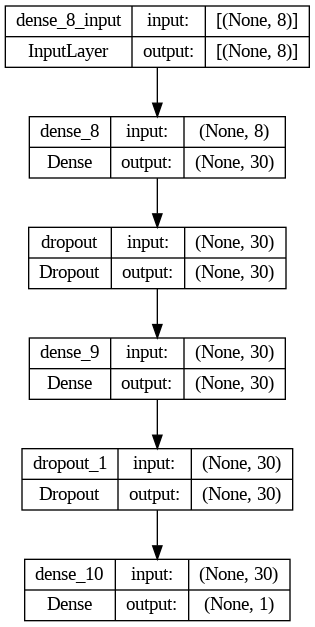

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=5e-3))

In [ ]:
# Demonstrate checkpoints
# https://keras.io/api/callbacks/model_checkpoint/
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.tf",
                                                save_best_only=True)
history = model.fit(X_train_tr, y_train_tr, epochs=10,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[checkpoint_cb])

Epoch 1/10
465/465 [==============================] - 3s 5ms/step - loss: 0.7373 - val_loss: 0.4933
Epoch 2/10
465/465 [==============================] - 2s 5ms/step - loss: 0.5157 - val_loss: 0.4508
Epoch 3/10
465/465 [==============================] - 2s 5ms/step - loss: 0.4747 - val_loss: 0.4319
Epoch 4/10
465/465 [==============================] - 3s 6ms/step - loss: 0.4610 - val_loss: 0.4163
Epoch 5/10
465/465 [==============================] - 2s 5ms/step - loss: 0.4459 - val_loss: 0.4064
Epoch 6/10
465/465 [==============================] - 3s 6ms/step - loss: 0.4380 - val_loss: 0.4017
Epoch 7/10
465/465 [==============================] - 2s 3ms/step - loss: 0.4318 - val_loss: 0.4114
Epoch 8/10
465/465 [==============================] - 2s 5ms/step - loss: 0.4235 - val_loss: 0.3987
Epoch 9/10
465/465 [==============================] - 3s 6ms/step - loss: 0.4136 - val_loss: 0.3874
Epoch 10/10
465/465 [==============================] - 2s 4ms/step - loss: 0.4116 - val_loss: 0.3925

In [ ]:
model = keras.models.load_model("temp_model.tf") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3824


In [ ]:
# Early Stopping
# https://keras.io/api/callbacks/early_stopping/
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True,
                                                  verbose=1)
history = model.fit(X_train_tr, y_train_tr, epochs=200,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
465/465 [==============================] - 3s 5ms/step - loss: 0.4080 - val_loss: 0.3803
Epoch 2/200
465/465 [==============================] - 2s 5ms/step - loss: 0.4002 - val_loss: 0.3767
Epoch 3/200
465/465 [==============================] - 2s 5ms/step - loss: 0.3966 - val_loss: 0.3723
Epoch 4/200
465/465 [==============================] - 4s 9ms/step - loss: 0.3934 - val_loss: 0.3661
Epoch 5/200
465/465 [==============================] - 2s 5ms/step - loss: 0.3875 - val_loss: 0.3625
Epoch 6/200
465/465 [==============================] - 2s 5ms/step - loss: 0.3848 - val_loss: 0.3597
Epoch 7/200
465/465 [==============================] - 2s 3ms/step - loss: 0.3842 - val_loss: 0.3757
Epoch 8/200
465/465 [==============================] - 2s 4ms/step - loss: 0.3795 - val_loss: 0.3611
Epoch 9/200
465/465 [==============================] - 3s 7ms/step - loss: 0.3731 - val_loss: 0.3589
Epoch 10/200
465/465 [==============================] - 2s 4ms/step - loss: 0.3739 - val_lo

In [ ]:
mse_test = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.3028


In [ ]:
# Create your own callback
# https://keras.io/guides/writing_your_own_callbacks/
class PrintLossRatio(keras.callbacks.Callback):
  (def on_epoch_endself, epoch, logs):
    print(f'   Val/train loss ratio: {logs["val_loss"]/logs["loss"]}')

loss_ratio_cb = PrintLossRatio()
history = model.fit(X_train_tr, y_train_tr, epochs=20,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[loss_ratio_cb])

SyntaxError: ignored

### Hyperparameter tuning

There are many ways to do this: </br>
1. Use a keras wrapper for sklearn and utilize sklearn tools (ie GridSearchCV etc) </br>
2. Use the [Keras Tuner](https://keras.io/keras_tuner/) (First stable release Nov 2021) </br>
3. Subclass sklearn models with custom fit functions for NNs (way more complicated)

First let's use the keras wrapper and sklearn tools.

In [ ]:
# Change runtime to GPU!

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

# Import California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

# 1. Preprocess
# Create training and testing and validation sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                              test_size=1/5)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=1/10)

# Scale data for keras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
# Remember only fit on training data, then transform validation and testing sets
X_train_v = scaler.transform(X_train_v)
X_test = scaler.transform(X_test)


In [ ]:
# Create a function that will build and compile model with user parameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=5e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=learning_rate))
  return model

In [ ]:
# Goal here is to create something that sklearn can use in its
# GridSearchCV and RandomizedSearchCV
# GridSearchCV -- tries all different possible parameters
# RandomizedSearchCV -- tries a subset and optimizes

# sklearn doesn't know how to deal with a TensorFlow model
# Two solutions -- one is to create a custom class in sklearn
#    ie derive from BaseEstimator and write methods fit() etc (complicated)
# -- other solution is to use a keras wrapper

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-120-65ee444e7c18>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
keras_reg.fit(X_train_tr, y_train_tr, epochs=100,
              validation_data=(X_train_v, y_train_v),
              callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
465/465 [==============================] - 7s 8ms/step - loss: 0.7134 - val_loss: 0.4957
Epoch 2/100
465/465 [==============================] - 3s 7ms/step - loss: 0.5024 - val_loss: 0.4646
Epoch 3/100
465/465 [==============================] - 3s 6ms/step - loss: 0.4650 - val_loss: 0.5372
Epoch 4/100
465/465 [==============================] - 3s 7ms/step - loss: 0.4449 - val_loss: 0.4330
Epoch 5/100
465/465 [==============================] - 2s 3ms/step - loss: 0.4219 - val_loss: 0.4286
Epoch 6/100
465/465 [==============================] - 1s 3ms/step - loss: 0.4147 - val_loss: 0.4184
Epoch 7/100
465/465 [==============================] - 1s 3ms/step - loss: 0.4120 - val_loss: 0.4214
Epoch 8/100
465/465 [==============================] - 2s 3ms/step - loss: 0.4009 - val_loss: 0.4134
Epoch 9/100
465/465 [==============================] - 2s 3ms/step - loss: 0.3960 - val_loss: 0.4055
Epoch 10/100
465/465 [==============================] - 1s 3ms/step - loss: 0.4018 - val_lo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden" : [1, 2, 3, 4],
    "n_neurons" : np.arange(5, 101, 5),
    "learning_rate" : [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
}
# 480 different parameter combinations -- GridSearchCV would try all of them

In [ ]:
np.arange(5,100,5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,
                                   cv=2, verbose=2)
rnd_search_cv.fit(X_train_tr, y_train_tr, epochs=50,
                  validation_data=(X_train_v, y_train_v),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Epoch 1/50
233/233 [==============================] - 2s 5ms/step - loss: 0.8844 - val_loss: 0.5508
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5035 - val_loss: 0.4551
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4374 - val_loss: 0.4410
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4132 - val_loss: 0.4176
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3950 - val_loss: 0.4875
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3859 - val_loss: 0.3961
Epoch 7/50
233/233 [==============================] - 1s 6ms/step - loss: 0.3761 - val_loss: 0.3982
Epoch 8/50
233/233 [==============================] - 1s 5ms/step - loss: 0.3703 - val_loss: 0.3849
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3591 - val_loss: 0.3913
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3575 - val_loss: 0.3750

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.8997 - val_loss: 0.5036
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4818 - val_loss: 0.4451
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4300 - val_loss: 0.4267
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4080 - val_loss: 0.4297
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3936 - val_loss: 0.4117
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3799 - val_loss: 0.4189
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3712 - val_loss: 0.3988
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3657 - val_loss: 0.4584
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3574 - val_loss: 0.3840
Epoch 10/50
233/233 [==============================] - 1s 5ms/step - loss: 0.3525 - val_loss: 0.4288

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.9798 - val_loss: 0.5750
Epoch 2/50
233/233 [==============================] - 1s 3ms/step - loss: 0.5373 - val_loss: 0.4822
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4639 - val_loss: 0.4499
Epoch 4/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4370 - val_loss: 0.4272
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4203 - val_loss: 0.4327
Epoch 6/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4097 - val_loss: 0.4054
Epoch 7/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4020 - val_loss: 0.3982
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3942 - val_loss: 0.3949
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3867 - val_loss: 0.3971
Epoch 10/50
233/233 [==============================] - 1s 3ms/step - loss: 0.3830 - val_loss: 0.3902

[CV] END .......learning_rate=0.03, n_hidden=2, n_neurons=50; total time=  41.9s
Epoch 1/50
233/233 [==============================] - 1s 4ms/step - loss: 0.9952 - val_loss: 0.5437
Epoch 2/50
233/233 [==============================] - 1s 3ms/step - loss: 0.5495 - val_loss: 0.4818
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4688 - val_loss: 0.4473
Epoch 4/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4383 - val_loss: 0.4412
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4224 - val_loss: 0.4314
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4111 - val_loss: 0.4192
Epoch 7/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4025 - val_loss: 0.4203
Epoch 8/50
233/233 [==============================] - 1s 3ms/step - loss: 0.3940 - val_loss: 0.4102
Epoch 9/50
233/233 [==============================] - 1s 3ms/step - loss: 0.3861 - val_loss: 0.4025
Epoch 10/50
233/233

[CV] END .......learning_rate=0.03, n_hidden=2, n_neurons=50; total time=  22.2s
Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.7637 - val_loss: 0.5354
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4961 - val_loss: 0.4595
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4506 - val_loss: 0.4397
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4308 - val_loss: 0.4237
Epoch 5/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4161 - val_loss: 0.4596
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4073 - val_loss: 0.4047
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4000 - val_loss: 0.4042
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3930 - val_loss: 0.3958
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3856 - val_loss: 0.3919
Epoch 10/50
233/233

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.9026 - val_loss: 0.5448
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5079 - val_loss: 0.4577
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4535 - val_loss: 0.4387
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4310 - val_loss: 0.4351
Epoch 5/50
233/233 [==============================] - 1s 6ms/step - loss: 0.4171 - val_loss: 0.4313
Epoch 6/50
233/233 [==============================] - 2s 6ms/step - loss: 0.4077 - val_loss: 0.4273
Epoch 7/50
233/233 [==============================] - 2s 7ms/step - loss: 0.3990 - val_loss: 0.4247
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3930 - val_loss: 0.4135
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3865 - val_loss: 0.4091
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3795 - val_loss: 0.4077

Epoch 1/50
233/233 [==============================] - 2s 6ms/step - loss: 0.8560 - val_loss: 0.5120
Epoch 2/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4662 - val_loss: 0.4317
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4213 - val_loss: 0.4232
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4002 - val_loss: 0.4242
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3854 - val_loss: 0.4934
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3763 - val_loss: 0.4208
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3689 - val_loss: 0.4043
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3717 - val_loss: 0.3730
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3550 - val_loss: 0.3851
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3537 - val_loss: 0.3665

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.8878 - val_loss: 0.5410
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5012 - val_loss: 0.4503
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4418 - val_loss: 0.4175
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4072 - val_loss: 0.4466
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3921 - val_loss: 0.3939
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3770 - val_loss: 0.4129
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3717 - val_loss: 0.3863
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3651 - val_loss: 0.4152
Epoch 9/50
233/233 [==============================] - 1s 6ms/step - loss: 0.3557 - val_loss: 0.3747
Epoch 10/50
233/233 [==============================] - 1s 5ms/step - loss: 0.3511 - val_loss: 0.4207

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.9751 - val_loss: 0.5591
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5257 - val_loss: 0.4845
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4735 - val_loss: 0.4641
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4474 - val_loss: 0.4327
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4268 - val_loss: 0.4996
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4129 - val_loss: 0.4281
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4015 - val_loss: 0.4054
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3920 - val_loss: 0.4028
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3831 - val_loss: 0.4010
Epoch 10/50
233/233 [==============================] - 1s 6ms/step - loss: 0.3811 - val_loss: 0.3869

Epoch 1/50
233/233 [==============================] - 3s 6ms/step - loss: 1.0907 - val_loss: 0.5966
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5603 - val_loss: 0.4980
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4845 - val_loss: 0.4570
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4504 - val_loss: 0.4824
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4325 - val_loss: 0.4468
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4157 - val_loss: 0.4332
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4048 - val_loss: 0.4264
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3971 - val_loss: 0.4839
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3871 - val_loss: 0.4062
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3799 - val_loss: 0.4555

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.8947 - val_loss: 0.5728
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5562 - val_loss: 0.4915
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4772 - val_loss: 0.4747
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4542 - val_loss: 0.4507
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4361 - val_loss: 0.4713
Epoch 6/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4248 - val_loss: 0.4197
Epoch 7/50
233/233 [==============================] - 1s 6ms/step - loss: 0.4163 - val_loss: 0.4082
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4063 - val_loss: 0.4058
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3983 - val_loss: 0.4003
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3949 - val_loss: 0.3926

Epoch 1/50
233/233 [==============================] - 2s 6ms/step - loss: 1.0113 - val_loss: 0.5799
Epoch 2/50
233/233 [==============================] - 1s 5ms/step - loss: 0.5417 - val_loss: 0.4923
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4816 - val_loss: 0.4588
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4541 - val_loss: 0.4585
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4372 - val_loss: 0.4377
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4254 - val_loss: 0.4317
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4155 - val_loss: 0.4400
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4097 - val_loss: 0.4268
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4020 - val_loss: 0.4171
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3962 - val_loss: 0.4153

Epoch 1/50
233/233 [==============================] - 2s 5ms/step - loss: 0.8920 - val_loss: 0.5534
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5105 - val_loss: 0.4629
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4494 - val_loss: 0.4468
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4276 - val_loss: 0.4203
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4096 - val_loss: 0.4573
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3983 - val_loss: 0.4002
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3889 - val_loss: 0.3904
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3811 - val_loss: 0.3908
Epoch 9/50
233/233 [==============================] - 1s 5ms/step - loss: 0.3729 - val_loss: 0.3904
Epoch 10/50
233/233 [==============================] - 1s 6ms/step - loss: 0.3698 - val_loss: 0.3784

Epoch 1/50
233/233 [==============================] - 2s 6ms/step - loss: 0.8710 - val_loss: 0.5162
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5097 - val_loss: 0.4500
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4530 - val_loss: 0.4275
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4220 - val_loss: 0.4425
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4089 - val_loss: 0.4099
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3974 - val_loss: 0.4104
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3924 - val_loss: 0.4038
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3837 - val_loss: 0.4157
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3737 - val_loss: 0.3865
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3666 - val_loss: 0.3980

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.8367 - val_loss: 0.5470
Epoch 2/50
233/233 [==============================] - 1s 5ms/step - loss: 0.5503 - val_loss: 0.4644
Epoch 3/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4514 - val_loss: 0.4364
Epoch 4/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4247 - val_loss: 0.4117
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4072 - val_loss: 0.4652
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3970 - val_loss: 0.3922
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3875 - val_loss: 0.3869
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3794 - val_loss: 0.3807
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3710 - val_loss: 0.3779
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3672 - val_loss: 0.3747

Epoch 1/50
233/233 [==============================] - 2s 5ms/step - loss: 0.8902 - val_loss: 0.5431
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5418 - val_loss: 0.4709
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4606 - val_loss: 0.4291
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4216 - val_loss: 0.4332
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4047 - val_loss: 0.4116
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3944 - val_loss: 0.4196
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3830 - val_loss: 0.4025
Epoch 8/50
233/233 [==============================] - 1s 5ms/step - loss: 0.3750 - val_loss: 0.4175
Epoch 9/50
233/233 [==============================] - 1s 6ms/step - loss: 0.3658 - val_loss: 0.3806
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3590 - val_loss: 0.3962

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.9006 - val_loss: 0.5470
Epoch 2/50
233/233 [==============================] - 1s 5ms/step - loss: 0.5320 - val_loss: 0.4565
Epoch 3/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4388 - val_loss: 0.4351
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4157 - val_loss: 0.4151
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3990 - val_loss: 0.4535
Epoch 6/50
233/233 [==============================] - 1s 3ms/step - loss: 0.3882 - val_loss: 0.4020
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3794 - val_loss: 0.3954
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3716 - val_loss: 0.3883
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3638 - val_loss: 0.3860
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3607 - val_loss: 0.3785

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.9540 - val_loss: 0.5403
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5023 - val_loss: 0.4564
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4455 - val_loss: 0.4296
Epoch 4/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4222 - val_loss: 0.4328
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4059 - val_loss: 0.4103
Epoch 6/50
233/233 [==============================] - 1s 3ms/step - loss: 0.3937 - val_loss: 0.4072
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3859 - val_loss: 0.3982
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3769 - val_loss: 0.4061
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.3685 - val_loss: 0.3821
Epoch 10/50
233/233 [==============================] - 1s 5ms/step - loss: 0.3623 - val_loss: 0.4030

Epoch 1/50
233/233 [==============================] - 2s 4ms/step - loss: 0.8810 - val_loss: 0.5898
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5295 - val_loss: 0.4923
Epoch 3/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4761 - val_loss: 0.4715
Epoch 4/50
233/233 [==============================] - 1s 5ms/step - loss: 0.4626 - val_loss: 0.4551
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4548 - val_loss: 0.4697
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4509 - val_loss: 0.4443
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4486 - val_loss: 0.4414
Epoch 8/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4444 - val_loss: 0.4395
Epoch 9/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4410 - val_loss: 0.4439
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.4398 - val_loss: 0.4366

[CV] END ........learning_rate=0.01, n_hidden=2, n_neurons=5; total time=  42.1s
Epoch 1/50
233/233 [==============================] - 1s 4ms/step - loss: 1.0218 - val_loss: 0.6276
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.5979 - val_loss: 0.5590
Epoch 3/50
233/233 [==============================] - 1s 3ms/step - loss: 0.5560 - val_loss: 0.5168
Epoch 4/50
233/233 [==============================] - 1s 3ms/step - loss: 0.5275 - val_loss: 0.5052
Epoch 5/50
233/233 [==============================] - 1s 3ms/step - loss: 0.5034 - val_loss: 0.4862
Epoch 6/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4883 - val_loss: 0.4661
Epoch 7/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4785 - val_loss: 0.4615
Epoch 8/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4653 - val_loss: 0.4605
Epoch 9/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4555 - val_loss: 0.4444
Epoch 10/50
233/233

Epoch 1/50
465/465 [==============================] - 3s 5ms/step - loss: 0.7213 - val_loss: 0.4875
Epoch 2/50
465/465 [==============================] - 2s 4ms/step - loss: 0.4663 - val_loss: 0.4478
Epoch 3/50
465/465 [==============================] - 2s 3ms/step - loss: 0.4206 - val_loss: 0.4510
Epoch 4/50
465/465 [==============================] - 2s 4ms/step - loss: 0.3972 - val_loss: 0.4023
Epoch 5/50
465/465 [==============================] - 2s 4ms/step - loss: 0.3888 - val_loss: 0.3963
Epoch 6/50
465/465 [==============================] - 2s 4ms/step - loss: 0.3713 - val_loss: 0.3867
Epoch 7/50
465/465 [==============================] - 2s 4ms/step - loss: 0.3670 - val_loss: 0.3921
Epoch 8/50
465/465 [==============================] - 2s 5ms/step - loss: 0.3506 - val_loss: 0.3604
Epoch 9/50
465/465 [==============================] - 2s 3ms/step - loss: 0.3426 - val_loss: 0.3669
Epoch 10/50
465/465 [==============================] - 2s 3ms/step - loss: 0.3344 - val_loss: 0.3902

RandomizedSearchCV(cv=2,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7a4a9fec4580>,
                   param_distributions={'learning_rate': [0.0001, 0.0003, 0.001,
                                                          0.003, 0.01, 0.03],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])},
                   verbose=2)

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 25, 'n_hidden': 3, 'learning_rate': 0.01}

In [ ]:
rnd_search_cv.best_score_

-0.3482712209224701

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.cv_results_

{'mean_fit_time': array([22.93567836, 23.53255987, 26.33483839, 20.01375329, 19.57575345,
        36.1527127 , 19.41298044, 26.78618193, 26.26265252, 26.10778594]),
 'std_fit_time': array([1.15421474, 4.63470483, 3.47014165, 3.35893357, 3.60402155,
        4.39301193, 2.65634906, 4.88330317, 4.97095549, 5.56988573]),
 'mean_score_time': array([12.75174665,  8.55077946, 15.80372298,  0.6233325 , 12.39242375,
         5.57822168,  3.03559124, 10.41979158, 15.89844203,  5.47557557]),
 'std_score_time': array([7.52885222, 5.20211589, 3.31037748, 0.06302595, 6.73768342,
        4.86418593, 2.3541609 , 9.82721531, 4.96750593, 4.92232454]),
 'param_n_neurons': masked_array(data=[85, 50, 25, 75, 30, 20, 70, 50, 65, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_hidden': masked_array(data=[4, 2, 3, 4, 4, 3, 3, 3, 3, 2],
              mask=[False, False, False, False,

Now let's try the [keras tuner.](https://keras.io/api/keras_tuner/)

In [ ]:
# Install and import keras tuner
!pip install -q -U keras-tuner
#!pip install keras-tuner --upgrade  # might also work
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Create a model builder function again
# Note the utilization of "hp" for all hyperparameters
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Int('units', min_value=8, max_value=32, step=8),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units_2', [8, 16, 32]),   # note different name
      activation='relu'))
  model.add(keras.layers.Dense(1))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
  # may need to add metrics argument for accuracy objective
  return model

# This has 3 parameters: units, units_2, and learning_rate
# Note this doesn't vary the number of hidden layers (we always have two)
#   How could we write a builder function that would do this?

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss'#, # would use 'val_accuracy' for classification
                     #overwrite=True,  # to build a second tuner after the first (it will keep the first in memory and give an error otherwise)
                     #max_epochs=20,
                     )
# there are many types of tuners: RandomSearch, BayesianOptimization, Sklearn, and this Hyperband
# https://keras.io/api/keras_tuner/tuners/

In [ ]:
tuner.search(X_train_tr, y_train_tr, epochs=20, validation_data=(X_train_v, y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Trial 36 Complete [00h 00m 05s]
val_loss: 0.36327341198921204

Best val_loss So Far: 0.3450376093387604
Total elapsed time: 00h 03m 42s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0001 summary
Hyperparameters:
units: 32
units_2: 32
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.3450376093387604

Trial 0023 summary
Hyperparameters:
units: 16
units_2: 32
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.353298157453537

Trial 0035 summary
Hyperparameters:
units: 24
units_2: 16
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.36327341198921204

Trial 0029 summary
Hyperparameters:
units: 32
units_2: 16
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.3668425679206848

Trial 0003 summary
Hyperparameters:
units: 16
units_2: 8
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.3680141568183899

Trial 0

In [ ]:
best_hps = tuner.get_best_hyperparameters()
best_hps
best_hps[0].get('learning_rate')  #('units')
# Note that KerasTuner packages the best_hps (and best_model) in lists
#   This is so that you can get the top N parameter_sets/models

0.01

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

In [ ]:
# Build model from best hyperparameters or use best model above
hyper_model = tuner.hypermodel.build(best_hps[0])

In [ ]:
# Train best model from hyper_model (starts over)
hyper_model.fit(X_train_tr, y_train_tr, epochs=50, validation_data=(X_train_v, y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
465/465 [==============================] - 4s 4ms/step - loss: 0.5404 - val_loss: 0.4367
Epoch 2/50
465/465 [==============================] - 2s 5ms/step - loss: 0.4183 - val_loss: 0.3706
Epoch 3/50
465/465 [==============================] - 3s 6ms/step - loss: 0.4463 - val_loss: 0.3565
Epoch 4/50
465/465 [==============================] - 3s 6ms/step - loss: 0.3541 - val_loss: 0.3706
Epoch 5/50
465/465 [==============================] - 4s 9ms/step - loss: 0.3270 - val_loss: 0.3274
Epoch 6/50
465/465 [==============================] - 3s 6ms/step - loss: 0.3190 - val_loss: 0.3177
Epoch 7/50
465/465 [==============================] - 3s 6ms/step - loss: 0.3090 - val_loss: 0.3169
Epoch 8/50
465/465 [==============================] - 3s 6ms/step - loss: 0.3033 - val_loss: 0.3027
Epoch 9/50
465/465 [==============================] - 4s 8ms/step - loss: 0.3034 - val_loss: 0.3209
Epoch 10/50
465/465 [==============================] - 3s 7ms/step - loss: 0.2943 - val_loss: 0.3044

In [ ]:
# Train from best_model (appears to keep epochs and weights already trained)
best_model.fit(X_train_tr, y_train_tr, epochs=20, validation_data=(X_train_v, y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
465/465 [==============================] - 3s 4ms/step - loss: 0.3492 - val_loss: 0.3404
Epoch 2/20
465/465 [==============================] - 2s 5ms/step - loss: 0.3442 - val_loss: 0.3298
Epoch 3/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3317 - val_loss: 0.3534
Epoch 4/20
465/465 [==============================] - 2s 4ms/step - loss: 0.3201 - val_loss: 0.3353
Epoch 5/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3141 - val_loss: 0.3327
Epoch 6/20
465/465 [==============================] - 2s 4ms/step - loss: 0.3108 - val_loss: 0.3137
Epoch 7/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3028 - val_loss: 0.3111
Epoch 8/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3068 - val_loss: 0.3244
Epoch 9/20
465/465 [==============================] - 2s 5ms/step - loss: 0.3132 - val_loss: 0.3134
Epoch 10/20
465/465 [==============================] - 2s 4ms/step - loss: 0.3049 - val_loss: 0.2963

In [ ]:
# Next level is using AutoML -- not only select parameters and tune for you
# but will also try different ML models, architectures, and will optimize